In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, det
import numpy as np
from scipy.special import logit, expit
from scipy.stats import norm

#**Least squares for classification**

$\mathbf{y(x)} = \mathbf{\widetilde{W}}^T \mathbf{\widetilde{x}}$

classification boundary:

$\mathbf{y(x)} = 0$

<ipython-input-96-7696f669f773>:30: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 1, 0.1)
<ipython-input-96-7696f669f773>:31: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 2, 0.1)


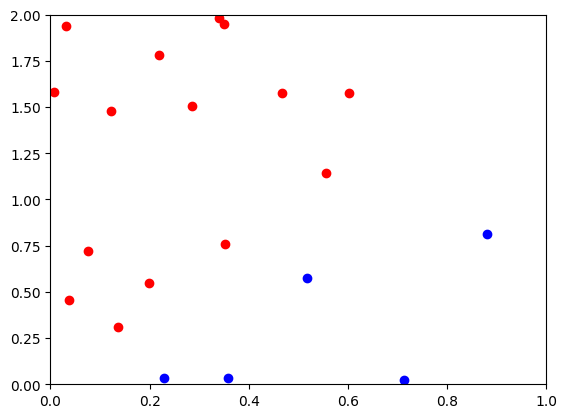

In [ ]:
# y = 2x
def getData(n):
  X1 = []
  X2 = []
  Y = []
  for i in range(0, n):
    X1.append(np.random.uniform(0, 1))
    X2.append(np.random.uniform(0, 2))
    if (X2[-1] - 2*X1[-1] > 0):
      Y.append(-1)
    else:
      Y.append(1)

  X1 = np.array(X1)
  X2 = np.array(X2)
  Y = np.array(Y)
  return np.concatenate((X1[:, np.newaxis], X2[:, np.newaxis]), axis=1), np.array(Y[:, np.newaxis])


def plot_data(x, y, size):
  for i in range(size):
    if y[i, 0] < 0:
      plt.scatter(x[i, 0], x[i, 1], color = 'red')
    else:
      plt.scatter(x[i, 0], x[i, 1], color = 'blue')

sample_size = 20
X_train, Y_train = getData(sample_size)

plt.xlim(0, 1, 0.1)
plt.ylim(0, 2, 0.1)
plot_data(X_train, Y_train, sample_size)

#Error Function

$E_D(\mathbf{\widetilde{W}}) = \frac{1}{2}Tr\{(\mathbf{\widetilde{X}} \mathbf{\widetilde{W}} - \mathbf{T})^T (\mathbf{\widetilde{X}} \mathbf{\widetilde{W}} - \mathbf{T})\}$

By taking the derivative, we get:

$\mathbf{\widetilde{W}} = (\mathbf{\widetilde{X}}^T \mathbf{\widetilde{X}})^{-1}\mathbf{\widetilde{X}}^T$

<ipython-input-104-26faa412eb7f>:13: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 1, 0.1)
<ipython-input-104-26faa412eb7f>:14: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 2, 0.1)


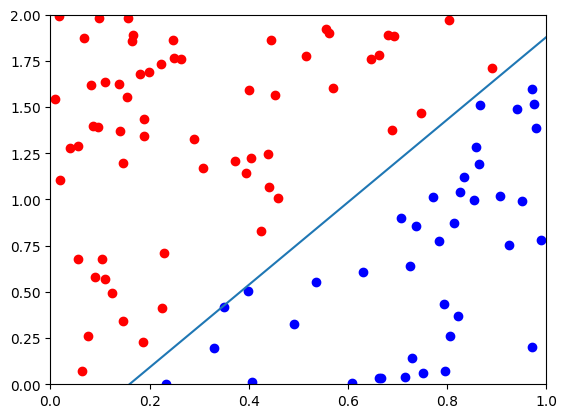

In [ ]:
# calculate W
X_tilde = np.insert(X_train, 0, 1, axis=1)
W = inv(X_tilde.T @ X_tilde) @ X_tilde.T @ Y_train

# Test our model on new data
x_0 = np.linspace(1, 1, 100)
x_1 = np.random.uniform(0, 1, 100)
x_2 = np.random.uniform(0, 2, 100)

x = np.concatenate((x_1[:, np.newaxis], x_2[:, np.newaxis]), axis=1)
x_tilde = np.concatenate((x_0[:, np.newaxis], x), axis=1)
y = x_tilde @ W
plt.xlim(0, 1, 0.1)
plt.ylim(0, 2, 0.1)

plot_data(x, y, 100)

# Draw the boundary
# y = w0 + w1x1 + w2x2 = 0
# we can calculate x2 given y=0
x1 = np.linspace(0, 1, 100)
x2 = (-W[0] - W[1] * x1) / W[2]
plt.plot(x1, x2)

#**An example with outliers**

The boundary tilts towards new data because the goal of the model is to minimize error instead of classify correctly.

In [ ]:
def getData(n):
  X1 = np.random.normal(0.3, 0.1, n // 2)
  X2 = np.random.normal(1.7, 0.1, n // 2)
  Y = np.array([-1 for i in range(0, n // 2)])

  X1 = np.concatenate((X1, np.random.normal(0.4, 0.1, n - n // 2)), axis=0)
  X2 = np.concatenate((X2, np.random.normal(1.2, 0.1, n - n // 2)), axis=0)
  Y = np.concatenate((Y, np.array([1 for i in range(0, n - n // 2)])), axis=0)

  return np.concatenate((X1[:, np.newaxis], X2[:, np.newaxis]), axis=1), np.array(Y[:, np.newaxis])


def plot_data(x, y, size):
  for i in range(size):
    if y[i, 0] < 0:
      plt.scatter(x[i, 0], x[i, 1], color = 'red')
    else:
      plt.scatter(x[i, 0], x[i, 1], color = 'blue')

sample_size = 20
X_train, Y_train = getData(sample_size)

plt.xlim(0, 1, 0.1)
plt.ylim(0, 2, 0.1)
plot_data(X_train, Y_train, sample_size)

NameError: ignored

<ipython-input-134-f0a211052655>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 1, 0.1)
<ipython-input-134-f0a211052655>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 2, 0.1)
<ipython-input-134-f0a211052655>:33: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 1, 0.1)
<ipython-input-134-f0a211052655>:34: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 2, 0.1)


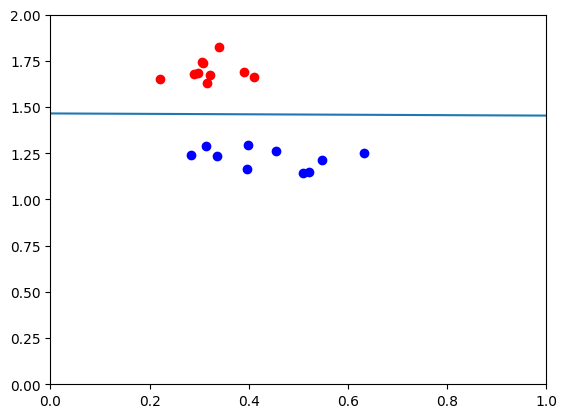

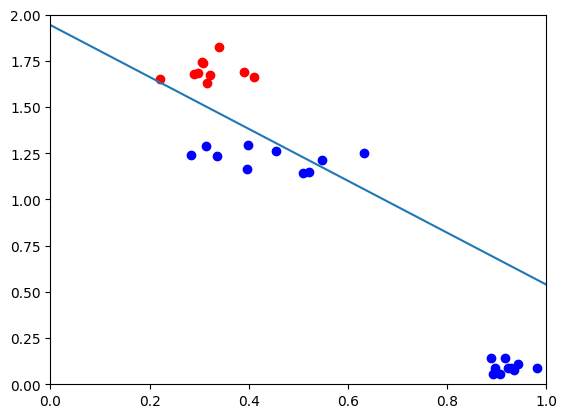

In [ ]:
# calculate W
X_tilde = np.insert(X_train, 0, 1, axis=1)
W = inv(X_tilde.T @ X_tilde) @ X_tilde.T @ Y_train

plt.figure(1)
plt.xlim(0, 1, 0.1)
plt.ylim(0, 2, 0.1)
# Draw the boundary
x1 = np.linspace(0, 1, 100)
x2 = (-W[0] - W[1] * x1) / W[2]
plt.plot(x1, x2)
plot_data(X_train, Y_train, sample_size)



# Let's add outliers
def getOutlierData(n):
  X1 = np.random.normal(0.9, 0.03, n)
  X2 = np.random.normal(0.1, 0.03, n)
  Y = np.array([1 for i in range(0, n)])

  return np.concatenate((X1[:, np.newaxis], X2[:, np.newaxis]), axis=1), np.array(Y[:, np.newaxis])

extra_data_size = 10
X_Outliers, Y_Outliers = getOutlierData(extra_data_size)
X_train = np.concatenate((X_train, X_Outliers), axis=0)
Y_train = np.concatenate((Y_train, Y_Outliers), axis=0)
# Recalculate W
X_tilde = np.insert(X_train, 0, 1, axis=1)
W = inv(X_tilde.T @ X_tilde) @ X_tilde.T @ Y_train

plt.figure(2)
plt.xlim(0, 1, 0.1)
plt.ylim(0, 2, 0.1)
# Draw the boundary
x1 = np.linspace(0, 1, 100)
x2 = (-W[0] - W[1] * x1) / W[2]
plt.plot(x1, x2)
plot_data(X_train, Y_train, sample_size + extra_data_size)

#**Fisher’s linear discriminant**

Let $\mathbf{m}_1$, $\mathbf{m}_2$ denote the means of the data belonging to each class.

Our goal is to:

1. Maximize the between-class covariance matrix:

  $\mathbf{S}_B = (\mathbf{m}_1 - \mathbf{m}_2)(\mathbf{m}_1 - \mathbf{m}_2)^T$

2. Minimize the within-class covariance matrix:

  $\mathbf{S}_W = \sum_{n \in class1}(\mathbf{x}_n - \mathbf{m}_1)(\mathbf{x}_n - \mathbf{m}_1)^T + \sum_{n \in class2}(\mathbf{x}_n - \mathbf{m}_2)(\mathbf{x}_n - \mathbf{m}_2)^T$

page 187

#**The perceptron algorithm**

<ipython-input-46-09541aab2a7d>:40: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 1, 0.1)
<ipython-input-46-09541aab2a7d>:41: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 2, 0.1)


[[1. 1.]]
[[ 32.06897111 -10.48270417]]
(2, 1)
(100, 2, 2)
(100,)


<ipython-input-46-09541aab2a7d>:75: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 1, 0.1)
<ipython-input-46-09541aab2a7d>:76: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 2, 0.1)


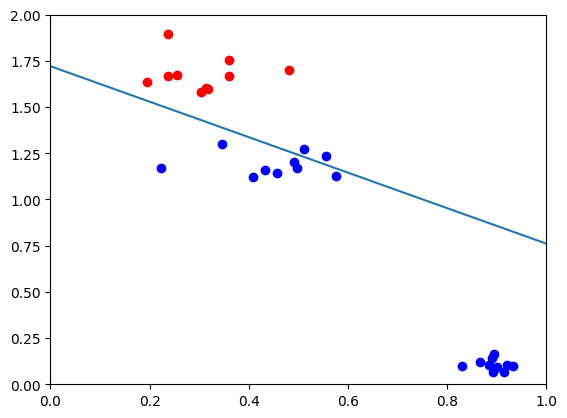

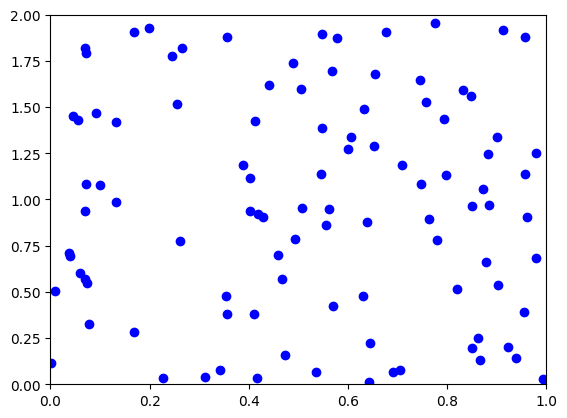

In [ ]:
def getData(n):
  X1 = np.random.normal(0.3, 0.1, n // 2)
  X2 = np.random.normal(1.7, 0.1, n // 2)
  Y = np.array([-1 for i in range(0, n // 2)])

  X1 = np.concatenate((X1, np.random.normal(0.4, 0.1, n - n // 2)), axis=0)
  X2 = np.concatenate((X2, np.random.normal(1.2, 0.1, n - n // 2)), axis=0)
  Y = np.concatenate((Y, np.array([1 for i in range(0, n - n // 2)])), axis=0)

  return np.concatenate((X1[:, np.newaxis], X2[:, np.newaxis]), axis=1), np.array(Y[:, np.newaxis])


def plot_data(x, y, size):
  for i in range(size):
    if y[i, 0] < 0:
      plt.scatter(x[i, 0], x[i, 1], color = 'red')
    else:
      plt.scatter(x[i, 0], x[i, 1], color = 'blue')

# Let's add outliers
def getOutlierData(n):
  X1 = np.random.normal(0.9, 0.03, n)
  X2 = np.random.normal(0.1, 0.03, n)
  Y = np.array([1 for i in range(0, n)])

  return np.concatenate((X1[:, np.newaxis], X2[:, np.newaxis]), axis=1), np.array(Y[:, np.newaxis])


sample_size = 20
X_train, Y_train = getData(sample_size)
extra_data_size = 10
X_Outliers, Y_Outliers = getOutlierData(extra_data_size)
X_train = np.concatenate((X_train, X_Outliers), axis=0)
Y_train = np.concatenate((Y_train, Y_Outliers), axis=0)

# Least Square Error W
X_tilde = np.insert(X_train, 0, 1, axis=1)
W = inv(X_tilde.T @ X_tilde) @ X_tilde.T @ Y_train
plt.figure(1)
plt.xlim(0, 1, 0.1)
plt.ylim(0, 2, 0.1)
# Draw the boundary
x1 = np.linspace(0, 1, 100)
x2 = (-W[0] - W[1] * x1) / W[2]
plt.plot(x1, x2)
plot_data(X_train, Y_train, sample_size + extra_data_size)

# Perceptron Algorithm
eta = 1
iters = 3
W = np.ones((1, 2))
print(W)
for iter in range(0, iters):
  for i in range(0, sample_size + extra_data_size):
    x = X_train[i][np.newaxis, :]
    t = Y_train[i]
    W = W + eta * x * t
print(W)


plt.figure(3)
# Test our model on new data
x_0 = np.linspace(1, 1, 100)
x_1 = np.random.uniform(0, 1, 100)
x_2 = np.random.uniform(0, 2, 100)

x = np.concatenate((x_1[:, np.newaxis], x_2[:, np.newaxis]), axis=1)
y = phi * x
y = y.sum(axis=2).sum(axis=1)
print(W.T.shape)
print(phi.shape)
print(y.shape)
plt.xlim(0, 1, 0.1)
plt.ylim(0, 2, 0.1)

plot_data(x, y[:, np.newaxis], 100)

#**Probabilistic Generative Models**

This model is for generation. Not really suitable for classification.

(We use 0, 1 encoding)

Two classes:

$p(\mathcal{C}_1 | \mathbf{x}) = \frac{p(\mathbf{x} | \mathcal{C}_1)p(\mathcal{C}_1)}{p(\mathbf{x} | \mathcal{C}_1)p(\mathcal{C}_1) + p(\mathbf{x} | \mathcal{C}_2)p(\mathcal{C}_2)} = \sigma(a)$

$a = ln \frac{p(\mathbf{x} | \mathcal{C}_1)p(\mathcal{C}_1)}{p(\mathbf{x} | \mathcal{C}_2)p(\mathcal{C}_2)}$

K classes

$p(\mathcal{C}_k | \mathbf{x}) = \frac{p(\mathbf{x} | \mathcal{C}_k)p(\mathcal{C}_k)}{\sum_{j}p(\mathbf{x} | \mathcal{C}_j)p(\mathcal{C}_j)} = \frac{exp(a_k)}{\sum_{j}exp(a_j)}$

$a_k = ln (p(\mathbf{x} | \mathcal{C}_k)p(\mathcal{C}_k))$

#*Continuous input*

Suppose each data group follows a gaussian distribution:

$p(\mathbf{x} | \mathcal{C}_k) = \frac{1}{(2\pi)^{-\frac{D}{2}}}\frac{1}{|\Sigma|^{-\frac{1}{2}}} exp\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu}_k)^T \Sigma^{-1} (\mathbf{x}-\mathbf{\mu}_k)\}$

* Suppose every distribution shares the same covariance matrix
* The model doesn't work well for outlier cases because the covariances wouldn't be the same.

*Two classes*

$a = \mathbf{w}^T \mathbf{x} + w_0$

$\mathbf{w} = \mathbf{\Sigma}^{-1} (\mathbf{\mu}_1 - \mathbf{\mu}_1)$

$w_0 = -\frac{1}{2}\mathbf{\mu}_1^T\mathbf{\Sigma}^{-1}\mathbf{\mu}_1 + \frac{1}{2}\mathbf{\mu}_2^T\mathbf{\Sigma}^{-1}\mathbf{\mu}_2 + ln\frac{p(\mathcal{C}_1)}{p(\mathcal{C}_2)}$


**Maximum likelihood solution**

$p(\mathcal{C}_1) = \pi$

$p(\mathcal{C}_2) = 1-\pi$

By taking the derivative of the (4.71) with respect to each variable, we get:

$\pi = \frac{1}{N}\sum_{n=1}^{N} t_n = \frac{N_1}{N}$

$\mu_1 = \frac{1}{N_1}\sum_{n=1}^{N} t_n \mathbf{x}_n$

$\mu_2 = \frac{1}{N_2}\sum_{n=1}^{N} (1-t_n) \mathbf{x}_n$

$\mathbf{\Sigma} = \mathbf{S} = \frac{N_1}{N} \mathbf{S}_1 + \frac{N_2}{N} \mathbf{S}_2$

$\mathbf{S}_1 = \frac{1}{N_1} \sum_{n\in\mathcal{C}_1}(\mathbf{x}_n-\mathbf{\mu}_1)(\mathbf{x}_n-\mathbf{\mu}_1)^T$

$\mathbf{S}_2 = \frac{1}{N_2} \sum_{n\in\mathcal{C}_2}(\mathbf{x}_n-\mathbf{\mu}_2)(\mathbf{x}_n-\mathbf{\mu}_2)^T$

<ipython-input-68-1f4bb87b442b>:43: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 1, 0.1)
<ipython-input-68-1f4bb87b442b>:44: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 2, 0.1)
<ipython-input-68-1f4bb87b442b>:97: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 1, 0.1)
<ipython-input-68-1f4bb87b442b>:98: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 2, 0.1)


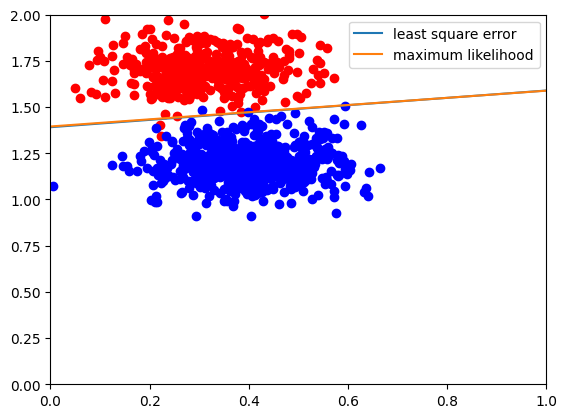

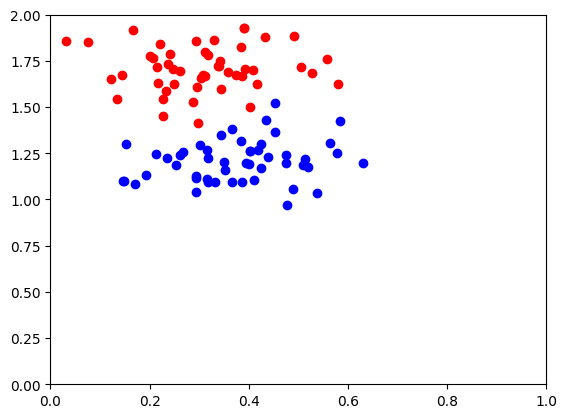

In [ ]:
def getData(n, pi, add_outlier = False):
  size1 = int(n * pi)
  size2 = n - int(n * pi)

  X1 = np.random.normal(0.3, 0.1, size1)
  X2 = np.random.normal(1.7, 0.1, size1)
  Y = np.array([1 for i in range(0, size1)])

  if not add_outlier:
    X1 = np.concatenate((X1, np.random.normal(0.4, 0.1, size2)), axis=0)
    X2 = np.concatenate((X2, np.random.normal(1.2, 0.1, size2)), axis=0)
    Y = np.concatenate((Y, np.array([-1 for i in range(0, size2)])), axis=0)
  else:
    size2_1 = (n - int(n * pi)) // 2
    size2_2 = n - size1 - size2_1
    # half are outlier data
    X1 = np.concatenate((X1, np.random.normal(0.4, 0.1, size2_1)), axis=0)
    X2 = np.concatenate((X2, np.random.normal(1.2, 0.1, size2_1)), axis=0)
    Y = np.concatenate((Y, np.array([-1 for i in range(0, size2_1)])), axis=0)

    X1 = np.concatenate((X1, np.random.normal(0.7, 0.06, size2_2)), axis=0)
    X2 = np.concatenate((X2, np.random.normal(0.3, 0.06, size2_2)), axis=0)
    Y = np.concatenate((Y, np.array([-1 for i in range(0, size2_2)])), axis=0)

  return np.concatenate((X1[:, np.newaxis], X2[:, np.newaxis]), axis=1), np.array(Y[:, np.newaxis])


def plot_data(x, y, size):
  for i in range(size):
    if y[i, 0] > 0:
      plt.scatter(x[i, 0], x[i, 1], color = 'red')
    else:
      plt.scatter(x[i, 0], x[i, 1], color = 'blue')

sample_size = 20
real_pi = 0.4
X_train, Y_train = getData(sample_size, real_pi, False)

# Least Square Error W
X_tilde = np.insert(X_train, 0, 1, axis=1)
W = inv(X_tilde.T @ X_tilde) @ X_tilde.T @ Y_train
plt.figure(1)
plt.xlim(0, 1, 0.1)
plt.ylim(0, 2, 0.1)
# Draw the boundary
x1 = np.linspace(0, 1, 100)
x2 = (-W[0] - W[1] * x1) / W[2]
plot_data(X_train, Y_train, sample_size)
plt.plot(x1, x2, label="least square error")




# Probabilistic
Y_train = Y_train / 2 + 0.5
N = Y_train.shape[0]
N1 = Y_train.sum()
N2 = N - N1
# Use maximum likelihood to find parameters
pi = N1 / N
mu_1 = 1 / N1 * (Y_train * X_train).sum(axis=0)
mu_2 = 1 / N2 * ((1-Y_train) * X_train).sum(axis=0)
S_1 = np.array([[0.0, 0.0], [0.0, 0.0]])
S_2 = np.array([[0.0, 0.0], [0.0, 0.0]])
# dumb simple method...
for i in range(0, N):
  if Y_train[i][0] == 1:
    x_minus_mu1 = (X_train[i] - mu_1)[:, np.newaxis].astype(float)
    S_1 += 1 / N1 * x_minus_mu1 @ x_minus_mu1.T
  else:
    x_minus_mu2 = (X_train[i] - mu_2)[:, np.newaxis].astype(float)
    S_2 += 1 / N1 * x_minus_mu2 @ x_minus_mu2.T
S = N1 / N * S_1 + N2 / N * S_2

w = inv(S) @ (mu_1[:, np.newaxis] - mu_2[:, np.newaxis])
w0 = -0.5 * mu_1.T @ inv(S) @ mu_1 + 0.5 * mu_2.T @ inv(S) @ mu_2 + np.log(pi / (1 - pi))


def sigmoid(x):
  return 1 / (1 + np.e ** (-x))

# Draw the boundary
# the boundary is phi(a) = 0.5, which means w^T * x + w0 = 0
x1 = np.linspace(0, 1, 100)
x2 = (-w0 - w[0][0] * x1) / w[1][0]
plt.plot(x1, x2, label="maximum likelihood")

plt.legend()



# Generate new data
size1 = 50
size2 = 50

plt.figure(2)
plt.xlim(0, 1, 0.1)
plt.ylim(0, 2, 0.1)
X_gen1, X_gen2 = np.random.multivariate_normal(mu_1, S, size1).T
plt.scatter(X_gen1, X_gen2, color = 'red')

X_gen1, X_gen2 = np.random.multivariate_normal(mu_2, S, size2).T
plt.scatter(X_gen1, X_gen2, color = 'blue')


#**Probabilistic Discriminative Models**




##**Logistic regression**

$p(\mathcal{C}_1 | \phi) = y(\phi) = \sigma(\mathbf{w}^T \phi)$

$p(\mathcal{C}_1 | \phi) = 1 - y(\phi)$

$p(\mathbf{t} | \mathbf{w}) = \prod_{n-1}^{N} y_n^{t_n} + (1 - y_n)^{1 - t_n}$

By applying The Newton-Raphson update:

$\mathbf{w}^{new} = \mathbf{w}^{old} - \mathbf{H}^{-1} \nabla {E(\mathbf{w})}$

$\nabla {E(\mathbf{w})} = \mathbf{\Phi}^T ( \mathbf{y} - \mathbf{t} )$

$\mathbf{H} = \mathbf{\Phi}^T \mathbf{R} \mathbf{\Phi}$

We can update w.

$\mathbf{w}^{new} = (\mathbf{\Phi}^T \mathbf{R} \mathbf{\Phi})^{-1} \mathbf{\Phi}^T \mathbf{R} \mathbf{z}$

$\mathbf{R} = Diag\{\mathbf{y}  (1 - \mathbf{y})^T\}$

$\mathbf{z} = \mathbf{\Phi} \mathbf{w} - \mathbf{R}^{-1} (\mathbf{y} - \mathbf{t})$

Text(0.5, 1.0, 'Boundaries on training data')

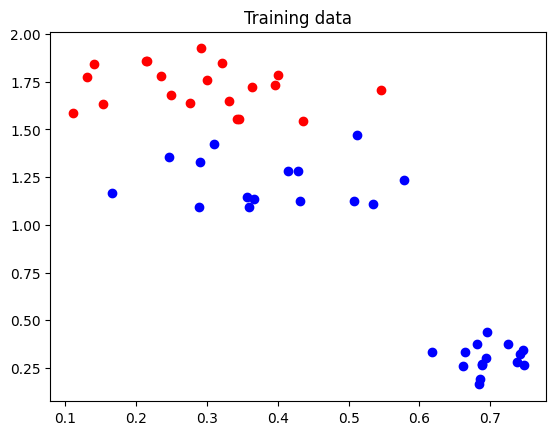

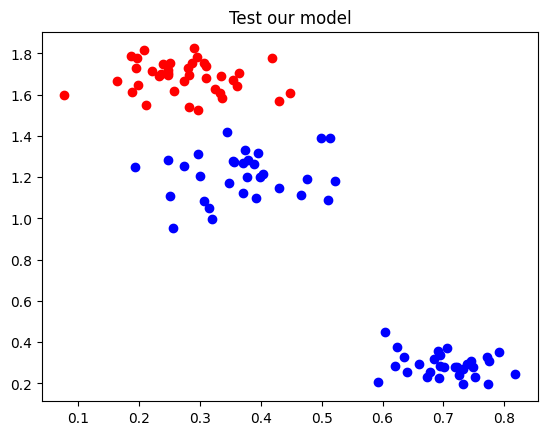

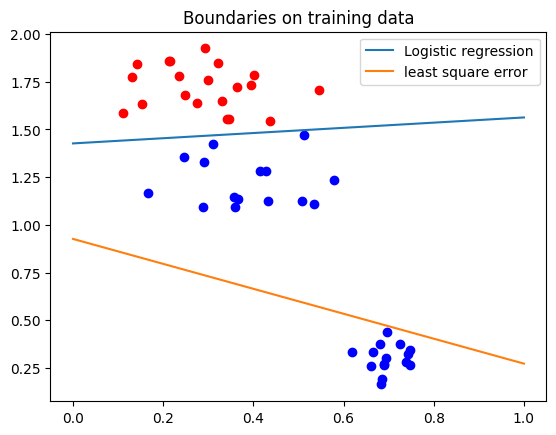

In [ ]:
def getData(n, pi, add_outlier = False):
  size1 = int(n * pi)
  size2 = n - int(n * pi)

  X1 = np.random.normal(0.3, 0.1, size1)
  X2 = np.random.normal(1.7, 0.1, size1)
  Y = np.array([1 for i in range(0, size1)])

  if not add_outlier:
    X1 = np.concatenate((X1, np.random.normal(0.4, 0.1, size2)), axis=0)
    X2 = np.concatenate((X2, np.random.normal(1.2, 0.1, size2)), axis=0)
    Y = np.concatenate((Y, np.array([0 for i in range(0, size2)])), axis=0)
  else:
    size2_1 = (n - int(n * pi)) // 2
    size2_2 = n - size1 - size2_1
    # half are outlier data
    X1 = np.concatenate((X1, np.random.normal(0.4, 0.1, size2_1)), axis=0)
    X2 = np.concatenate((X2, np.random.normal(1.2, 0.1, size2_1)), axis=0)
    Y = np.concatenate((Y, np.array([0 for i in range(0, size2_1)])), axis=0)

    X1 = np.concatenate((X1, np.random.normal(0.7, 0.06, size2_2)), axis=0)
    X2 = np.concatenate((X2, np.random.normal(0.3, 0.06, size2_2)), axis=0)
    Y = np.concatenate((Y, np.array([0 for i in range(0, size2_2)])), axis=0)

  return np.concatenate((X1[:, np.newaxis], X2[:, np.newaxis]), axis=1), np.array(Y[:, np.newaxis])

def plot_data(x, y, size, criterian):
  for i in range(size):
    if y[i, 0] > criterian:
      plt.scatter(x[i, 0], x[i, 1], color = 'red')
    else:
      plt.scatter(x[i, 0], x[i, 1], color = 'blue')


sample_size = 50
real_pi = 0.4
X_train, Y_train = getData(sample_size, real_pi, True)
plt.figure(1)
plot_data(X_train, Y_train, sample_size, 0.5)
plt.title("Training data")


# Phi can be quadratic but may lead to very big w
def getPhi(x):
  phi1 = np.ones((x.shape[0], 1))
  phi2 = x[:, 0][:, np.newaxis]
  phi3 = x[:, 1][:, np.newaxis]
  phi4 = (x[:, 0]**2)[:, np.newaxis]
  phi5 = (x[:, 1]**2)[:, np.newaxis]
  phi6 = (x[:, 0] * x[:, 1])[:, np.newaxis]
  # return np.concatenate((phi1, phi2, phi3, phi4, phi5, phi6), axis=1)
  return np.concatenate((phi1, phi2, phi3), axis=1)

phi = getPhi(X_train)
w = np.ones((3, 1))
w = w/10

def sigmoid(x):
  return 1.0 / (1.0 + np.e ** (-x))

iters = 5
for i in range(0, iters):
  # print(w)
  y = sigmoid(phi @ w)
  # print(y)

  # R can be interpreted as a variance of t (Y_train)
  R = y @ (1 - y).T
  R = np.diag(np.diag(R))
  # print(R)

  # Method 1: directly calculate gradient and hessian
  gradient_Ew = phi.T @ (y - Y_train)
  H = phi.T @ R @ phi
  w = w - inv(H) @ gradient_Ew

  # # Method 2: use the equation
  # # z can be interpreted as the new  phi.T @ w (4.103)
  # z = phi @ w - inv(R) @ (y - Y_train)
  # # print(det(phi.T @ R @ phi))
  # w = inv(phi.T @ R @ phi) @ phi.T @ R @ z



test_sample_size = 100
real_pi = 0.4
X_test, Y_test = getData(test_sample_size, real_pi, True)
phi = getPhi(X_test)
Y_test = sigmoid(phi @ w)
plt.figure(2)
plot_data(X_test, Y_test, test_sample_size, 0.5)

plt.title("Test our model")




plt.figure(3)
# Boundary
plot_data(X_train, Y_train, sample_size, 0.5)

# Only for 1 order model!!!
# Logistic regression
x1 = np.linspace(0, 1, 100)
x2 = (-w[0] - w[1] * x1) / w[2]
plt.plot(x1, x2, label="Logistic regression")


# Compare it to least squre (Same code)
# calculate W
X_tilde = np.insert(X_train, 0, 1, axis=1)
W = inv(X_tilde.T @ X_tilde) @ X_tilde.T @ Y_train

# Draw the boundary
# y = w0 + w1x1 + w2x2 = 0
# we can calculate x2 given y=0
x1 = np.linspace(0, 1, 100)
x2 = (-W[0] - W[1] * x1) / W[2]
plt.plot(x1, x2, label="least square error")
plt.legend()
plt.title("Boundaries on training data")

#**Laplace Approximation**

$z_0 : \frac{df(z)}{z} | _{z={z_0}}$ (mode)

$A = - \nabla \nabla ln f(z) | _{z={z_0}}$

Then we get the unnormalized approximation

$f(z) \approx \mathcal{N}(z | z_0 , A^{-1})$

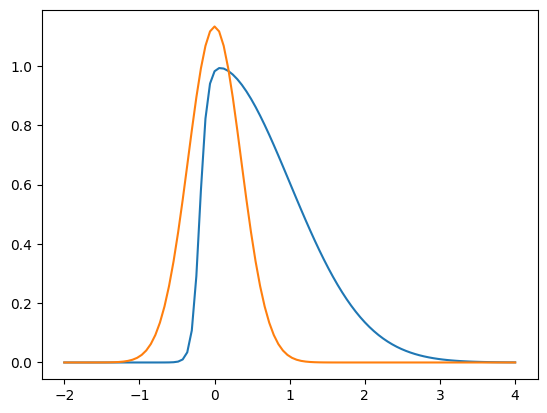

In [ ]:
def sigmoid(x):
  return 1.0 / (1.0 + np.e ** (-x))

def getTargetProb(x):
  return np.e ** (-x**2/2) * sigmoid(20*x + 4)

x = np.linspace(-2, 4, 100)
plt.plot(x, getTargetProb(x))

# suppose the mode is given
mode = 0

mean = mode
A = (np.e ** 8 + 402 * np.e**4 + 1) / (np.e ** 4 + 1)**2  # Second derivative

gaussianApproximation = (A / (2*np.pi))**0.5 * np.e**(-A/2 * (x-mean)**2)
plt.plot(x, gaussianApproximation)


#**Similarity between sigmoid and logit function**

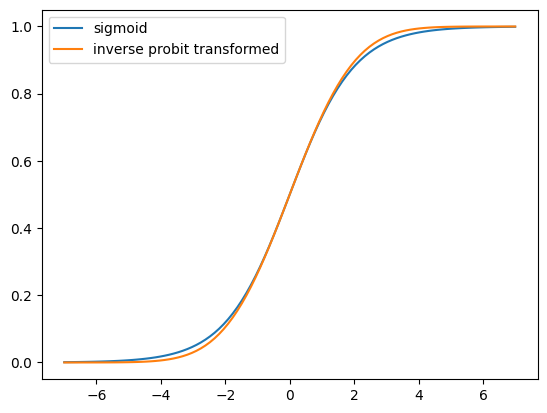

In [ ]:
import numpy as np
from scipy.special import logit, expit
from scipy.stats import norm

def sigmoid(x):
  return 1.0 / (1.0 + np.e ** (-x))

def inv_probit(x):
  return norm.cdf(x)

plt.figure(1)
x = np.linspace(-7, 7, 100)
plt.plot(x, sigmoid(x), label = "sigmoid")
plt.plot(x, inv_probit(  (np.pi / 8)**0.5 * x  ), label = "inverse probit transformed")
plt.legend()

#**Bayesian Logistic Regression**

[[0.65449579 0.66508957 0.57919544 ... 0.5724385  0.57244343 0.57244173]
 [0.66134722 0.68691433 0.58334777 ... 0.57581063 0.57582536 0.57581865]
 [0.67052317 0.68841653 0.58625856 ... 0.5779025  0.57791695 0.57791167]
 ...
 [0.56432868 0.63316596 0.55040953 ... 0.55173201 0.55173428 0.5517265 ]
 [0.54705304 0.59974226 0.54256948 ... 0.54564714 0.54564155 0.54563808]
 [0.55322039 0.61437522 0.54560097 ... 0.54803277 0.54803047 0.5480251 ]]


Text(0.5, 1.0, 'Test our model')

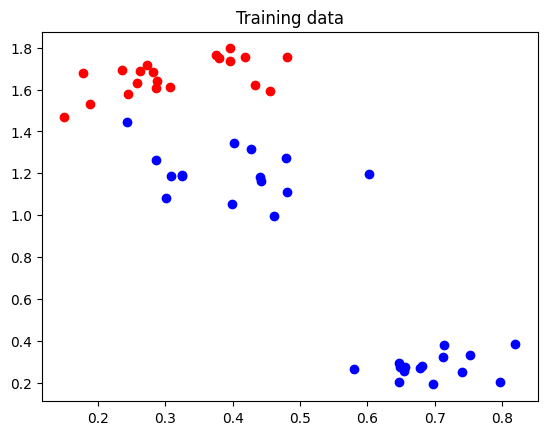

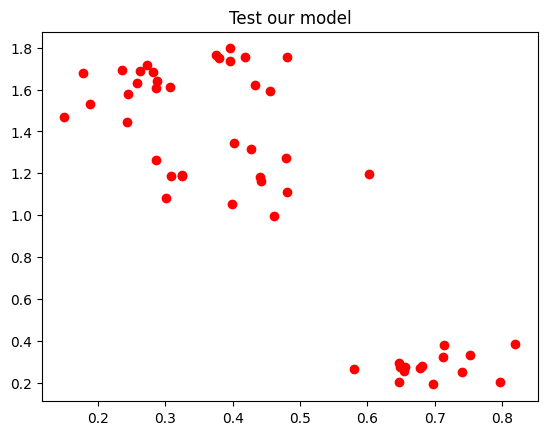

In [ ]:
def getData(n, pi, add_outlier = False):
  size1 = int(n * pi)
  size2 = n - int(n * pi)

  X1 = np.random.normal(0.3, 0.1, size1)
  X2 = np.random.normal(1.7, 0.1, size1)
  Y = np.array([1 for i in range(0, size1)])

  if not add_outlier:
    X1 = np.concatenate((X1, np.random.normal(0.4, 0.1, size2)), axis=0)
    X2 = np.concatenate((X2, np.random.normal(1.2, 0.1, size2)), axis=0)
    Y = np.concatenate((Y, np.array([0 for i in range(0, size2)])), axis=0)
  else:
    size2_1 = (n - int(n * pi)) // 2
    size2_2 = n - size1 - size2_1
    # half are outlier data
    X1 = np.concatenate((X1, np.random.normal(0.4, 0.1, size2_1)), axis=0)
    X2 = np.concatenate((X2, np.random.normal(1.2, 0.1, size2_1)), axis=0)
    Y = np.concatenate((Y, np.array([0 for i in range(0, size2_1)])), axis=0)

    X1 = np.concatenate((X1, np.random.normal(0.7, 0.06, size2_2)), axis=0)
    X2 = np.concatenate((X2, np.random.normal(0.3, 0.06, size2_2)), axis=0)
    Y = np.concatenate((Y, np.array([0 for i in range(0, size2_2)])), axis=0)

  return np.concatenate((X1[:, np.newaxis], X2[:, np.newaxis]), axis=1), np.array(Y[:, np.newaxis])

def plot_data(x, y, size, criterian):
  for i in range(size):
    if y[i, 0] > criterian:
      plt.scatter(x[i, 0], x[i, 1], color = 'red')
    else:
      plt.scatter(x[i, 0], x[i, 1], color = 'blue')


sample_size = 50
real_pi = 0.4
X_train, Y_train = getData(sample_size, real_pi, True)
plt.figure(1)
plot_data(X_train, Y_train, sample_size, 0.5)
plt.title("Training data")


# Phi can be quadratic but may lead to very big w
def getPhi(x):
  phi1 = np.ones((x.shape[0], 1))
  phi2 = x[:, 0][:, np.newaxis]
  phi3 = x[:, 1][:, np.newaxis]
  phi4 = (x[:, 0]**2)[:, np.newaxis]
  phi5 = (x[:, 1]**2)[:, np.newaxis]
  phi6 = (x[:, 0] * x[:, 1])[:, np.newaxis]
  # return np.concatenate((phi1, phi2, phi3, phi4, phi5, phi6), axis=1)
  return np.concatenate((phi1, phi2, phi3), axis=1)



phi = getPhi(X_train)
wMAP = np.ones((3, 1)) / 10 # mN
SN = np.eye(3) / 10

def sigmoid(x):
  return 1.0 / (1.0 + np.e ** (-x))

iters = 1000
for i in range(0, iters):
  y = sigmoid(phi @ w)
  S0 = SN.copy()
  SN = inv(phi.T * ((y * (1 - y)).reshape(-1)) @ phi + inv(SN))
  # grad = phi.T @ (y - Y_train).reshape(-1) + inv(SN) @ (w - wMAP)
  wMAP = S0 @ (phi.T * (Y_train - y).reshape(-1) + inv(S0) @ wMAP)
  a = phi @ w
  mu_a = phi @ wMAP
  sigma_square = (phi @ SN @ phi.T)

prob = sigmoid((1 + np.pi * sigma_square / 8)**-0.5 * mu_a)
print(prob)



plt.figure(2)
plot_data(X_train, prob, sample_size, 0.5)

plt.title("Test our model")




# plt.figure(3)
# # Boundary
# plot_data(X_train, Y_train, sample_size, 0.5)

# # Only for 1 order model!!!
# # Logistic regression
# x1 = np.linspace(0, 1, 100)
# x2 = (-w[0] - w[1] * x1) / w[2]
# plt.plot(x1, x2, label="Logistic regression")


# # Compare it to least squre (Same code)
# # calculate W
# X_tilde = np.insert(X_train, 0, 1, axis=1)
# W = inv(X_tilde.T @ X_tilde) @ X_tilde.T @ Y_train

# # Draw the boundary
# # y = w0 + w1x1 + w2x2 = 0
# # we can calculate x2 given y=0
# x1 = np.linspace(0, 1, 100)
# x2 = (-W[0] - W[1] * x1) / W[2]
# plt.plot(x1, x2, label="least square error")
# plt.legend()
# plt.title("Boundaries on training data")